In [6]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use("arviz-darkgrid")


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


# Chapter 2 homework


## 2E1

Which of the expressions below correspond to the statement: *the probability of rain on Monday?*

- (1) Pr(rain)
- (2) Pr(rain|Monday)
- (3) Pr(Monday|rain)
- (4) Pr(rain, Monday)/ Pr(Monday)

**Answer**

Pr(rain|Monday)

## 2E2

Which of the following statements corresponds to the expression: 
*Pr(Monday|rain)?*

- (1) The probability of rain on Monday.
- (2) The probability of rain, given that it is Monday.
- (3) The probability that it is Monday, given that it is raining.
- (4) The probability that it is Monday and that it is raining.

**Answer**

(1) The probability of rain on Monday.



Which of the expressions below correspond to the statement: *the probability that it is Monday, given that it is raining?*
- (1) Pr(Monday|rain)
- (2) Pr(rain|Monday)
- (3) Pr(rain|Monday) Pr(Monday)
- (4) Pr(rain|Monday) Pr(Monday)/ Pr(rain)
- (5) Pr(Monday|rain) Pr(rain)/ Pr(Monday)

**Answer**

- (2) Pr(rain|Monday)
- (4) Pr(rain|Monday) Pr(Monday)/ Pr(rain)

## 2E4 

The Bayesian statistician Bruno de Finetti (1906–1985) began his book on probability theory
with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original, so
I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device
for describing uncertainty from the perspective of an observer with limited knowledge; it has no
objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What
does it mean to say “the probability of water is 0.7”?

**Answer**

Stating that some probability is 0.7 doesn't mean objectively true, it's just stating that with current knowledge we belief that this is the case. This belief can further change when we receive new data. Thus probability is not something that really exists.

## 2M1

Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.

- (1) W, W, W
- (2) W, W, W, L
- (3) L, W, W, L, W, W, W

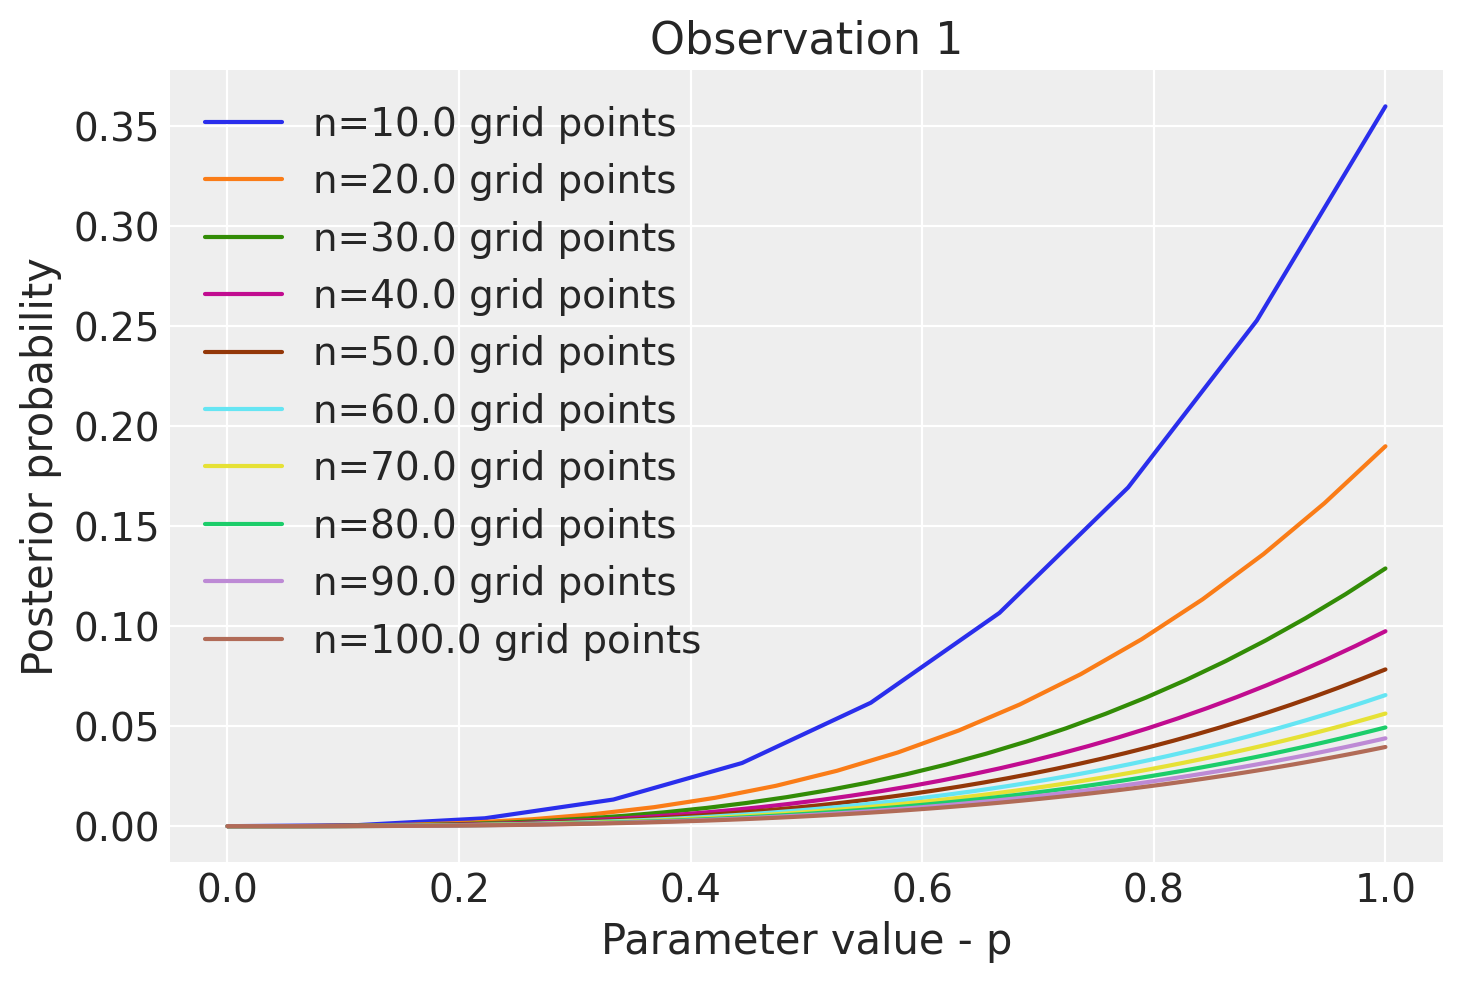

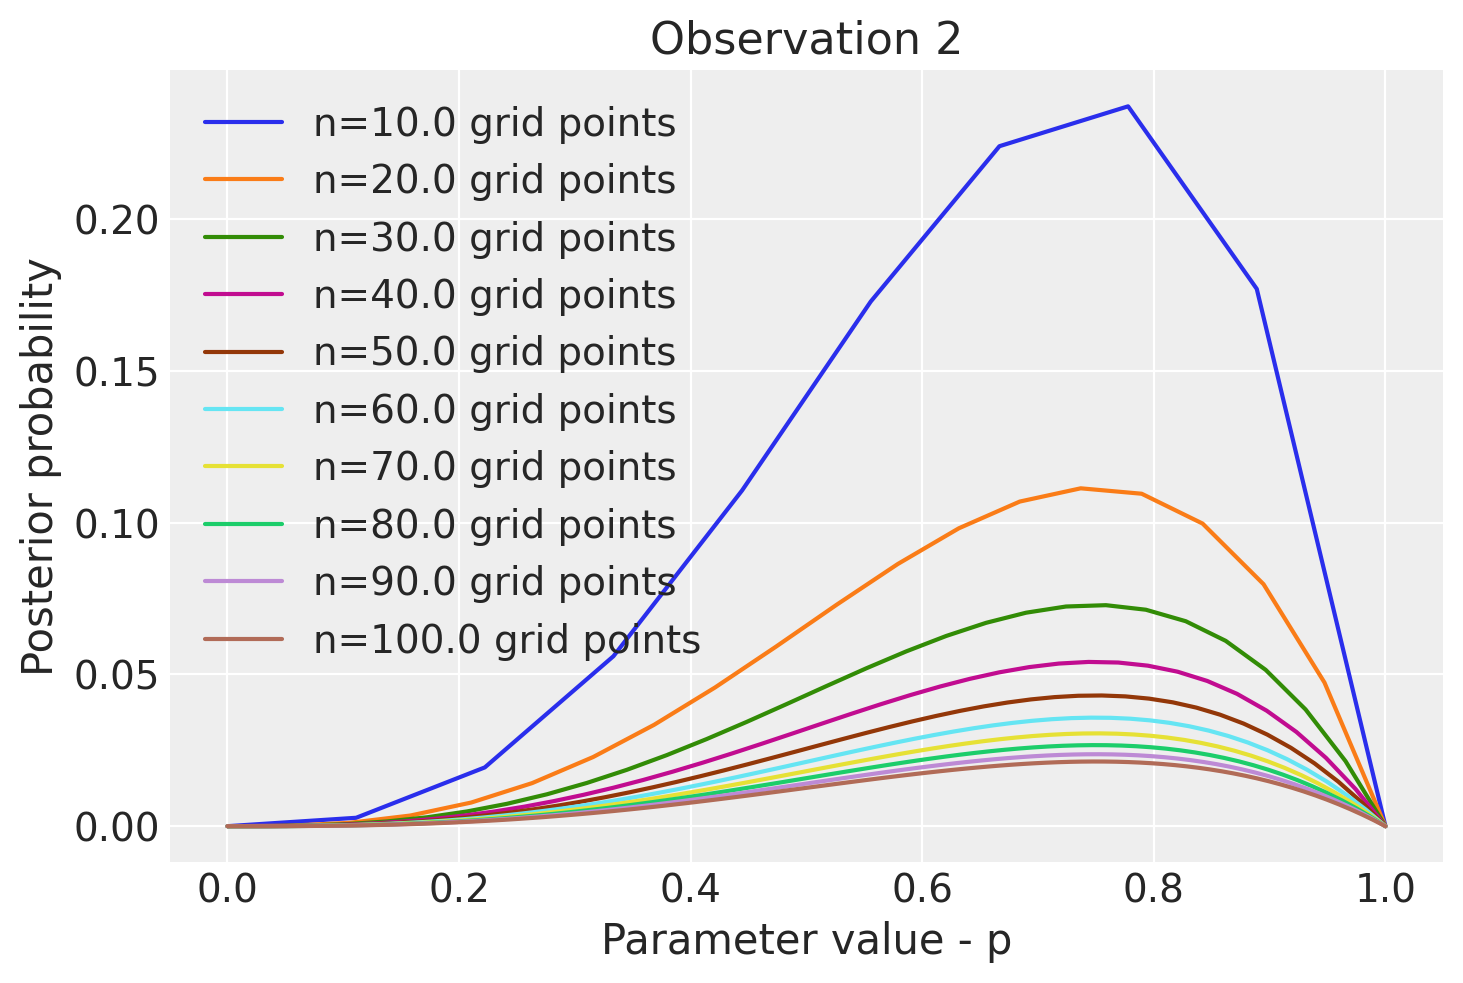

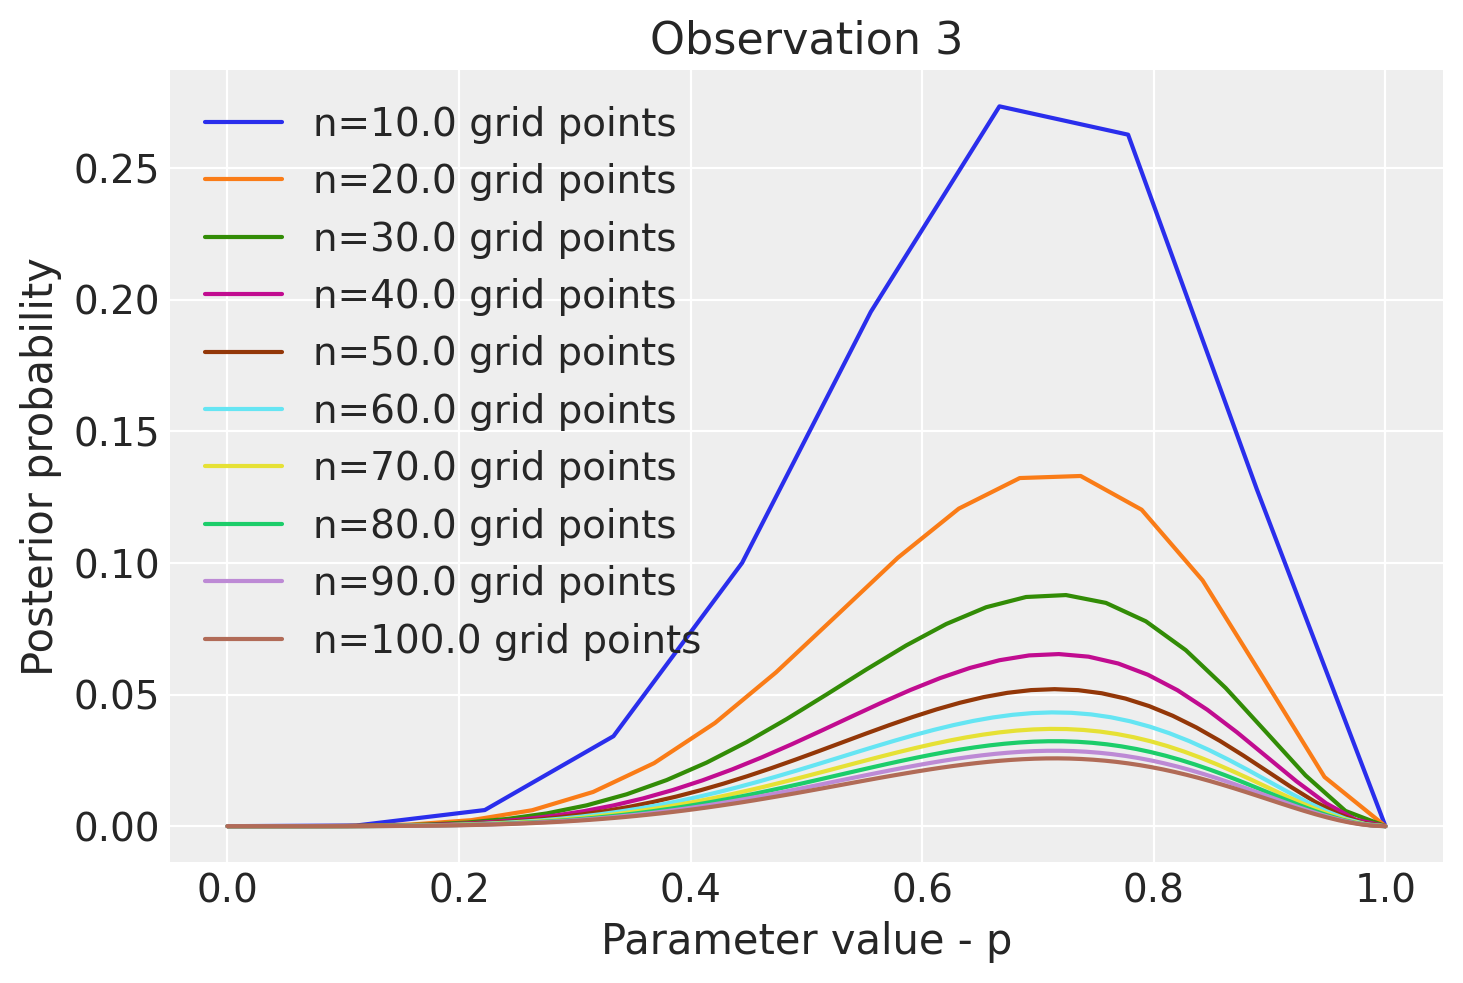

In [19]:
W = np.array([3, 3, 5])
Total = np.array([3, 4, 7])
for w, total, indx in zip(W, Total, range(3)):
    plt.figure()
    for n in np.linspace(10, 100, 10):
        p = np.linspace(0, 1, int(n))
        likelihood = stats.binom.pmf(w, total, p)
        prior = 1
        posterior = likelihood * prior
        posterior = posterior / np.sum(posterior)
        plt.plot(p, posterior, label=f"n={n} grid points")

    plt.title(f"Observation {indx + 1}")
    plt.xlabel("Parameter value - p")
    plt.ylabel("Posterior probability")
    plt.legend()
    plt.show()


## 2M2

Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

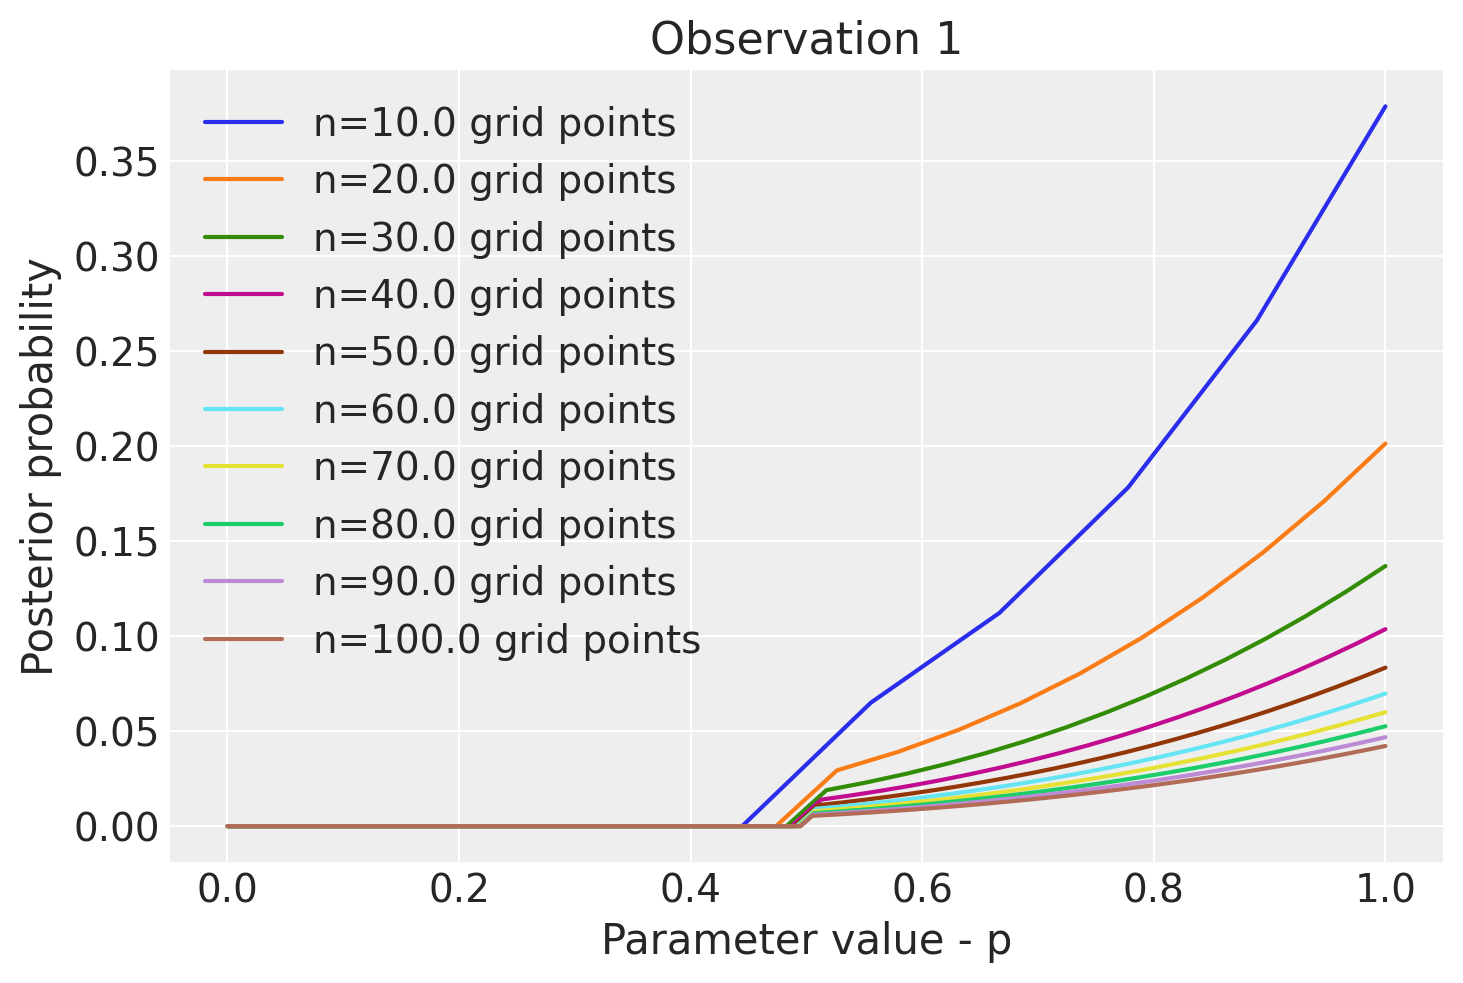

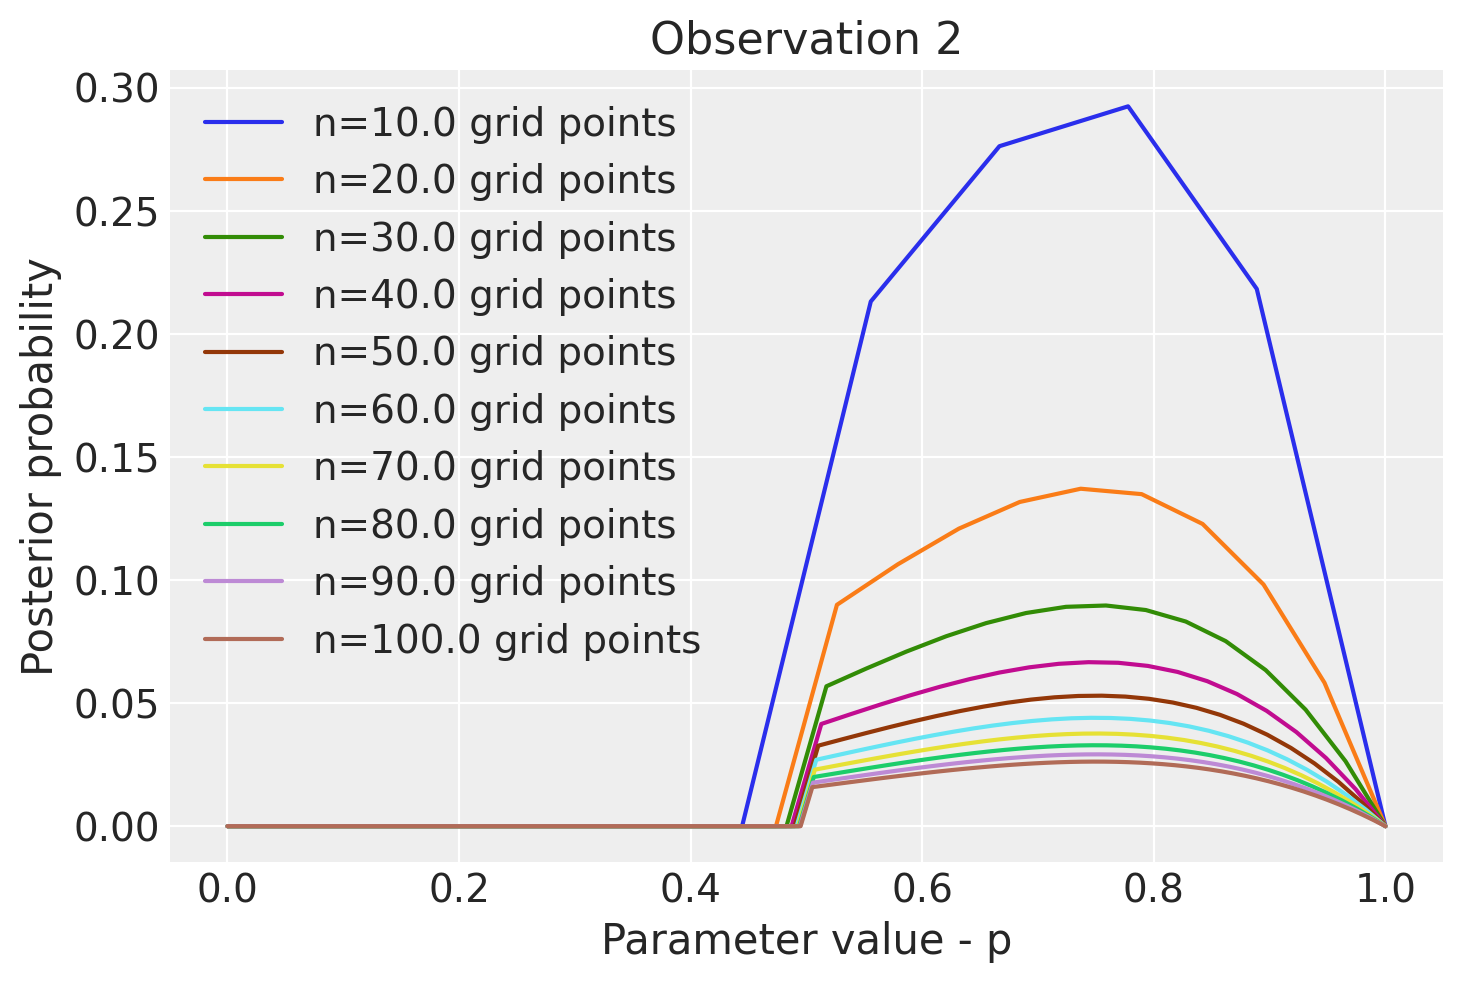

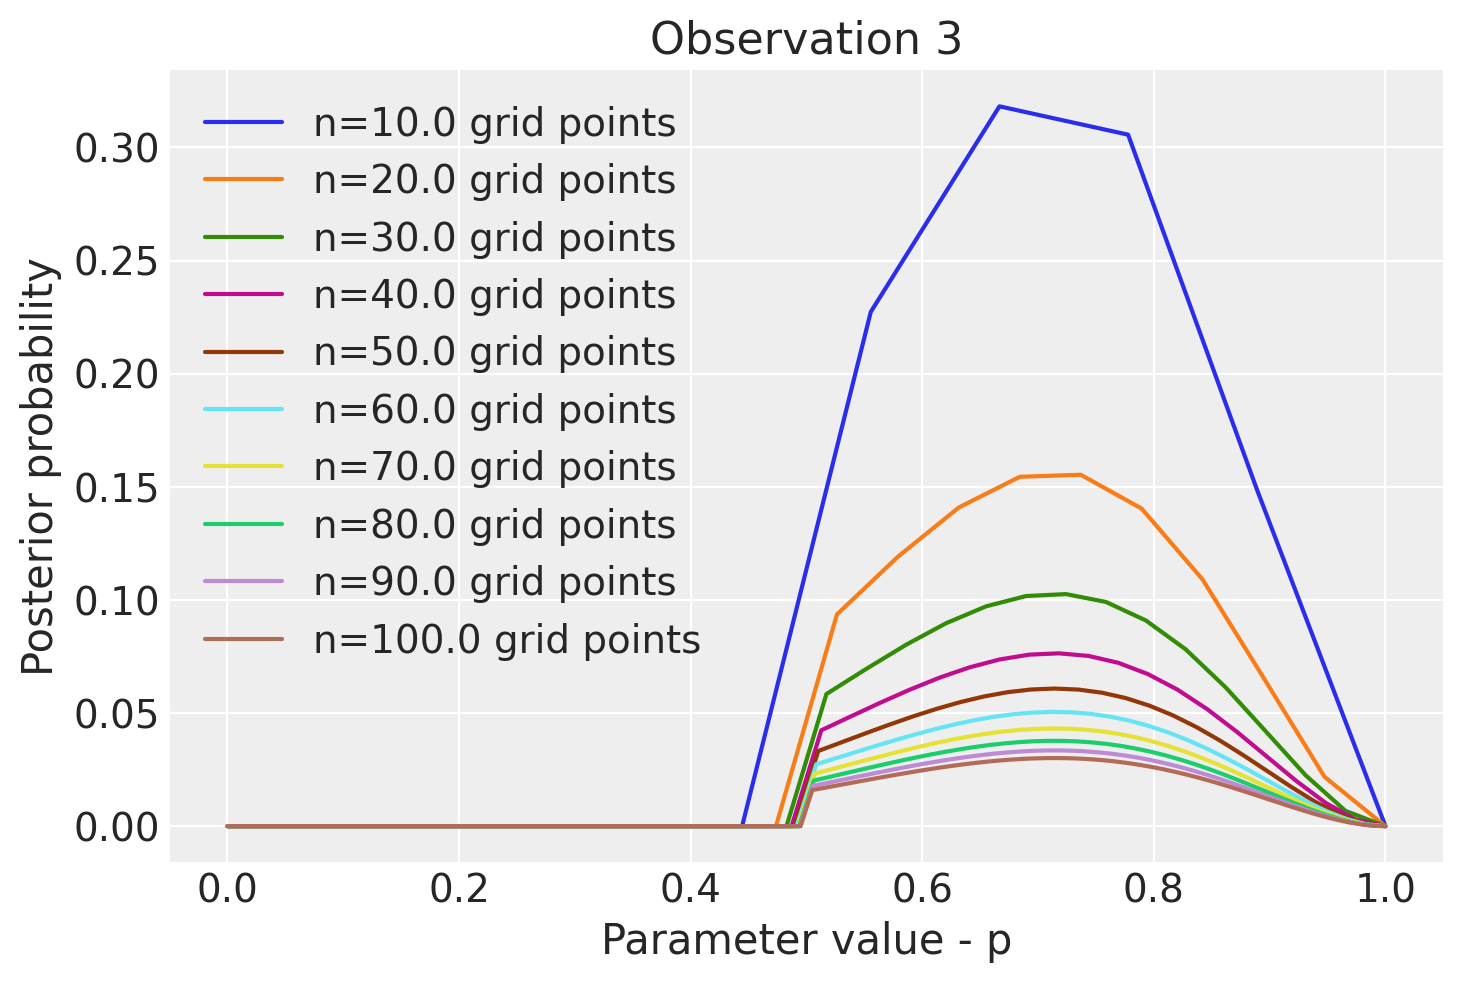

In [25]:
W = np.array([3, 3, 5])
Total = np.array([3, 4, 7])
for w, total, indx in zip(W, Total, range(3)):
    plt.figure()
    for n in np.linspace(10, 100, 10):
        p = np.linspace(0, 1, int(n))
        likelihood = stats.binom.pmf(w, total, p)
        prior = np.heaviside(p - 0.5, 0.5)
        posterior = likelihood * prior
        posterior = posterior / np.sum(posterior)
        plt.plot(p, posterior, label=f"n={n} grid points")

    plt.title(f"Observation {indx + 1}")
    plt.xlabel("Parameter value - p")
    plt.ylabel("Posterior probability")
    plt.legend()
    plt.show()


## 2M3

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23.

$$
P(E|L) = \frac{Pr(L|E)Pr(E)}{Pr(L)} = \frac{Pr(L|E)Pr(E)}{Pr(L|E)Pr(E)+Pr(L|M)Pr(M)} = \frac{Pr(L|E)}{Pr(L|E)+ Pr(L|M)} = \frac{0.3}{0.3+1} = 0.23
$$

where Pr(E) = Pr(M) and Pr(L|E) = 1 - Pr(W|E) = 1 - 0.7 = 0.3



## 2M4 

Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,
but you don’t know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).

$$
Pr(DB|B) = \frac{Pr(B|DB)Pr(DB)}{Pr(B)} = \frac{1 * (1/3)}{1/2} = \frac{2}{3}
$$